# NPL with hotel review part 1


## Exploratory Data Analysis


In [29]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import ast


In [30]:
#loading data

data= pd.read_csv('data/Hotel_Reviews.csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [31]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 515738 rows and 17 columns


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

There are two columns with the reviews as a decimal value: `Average_Score` and `Reviewer_Score`. We a going to convert them in to interger from 1-9 with the rule is:
-   Round up if the decimal > 0.5
-   Round down if the decimal < 0.5

In [33]:
data[['Average_Score', 'Reviewer_Score']]= data[['Average_Score', 'Reviewer_Score']].astype(int)

In [34]:
#Check it
data['Average_Score'].value_counts().sort_index()

5        65
6      5600
7     88982
8    341578
9     79513
Name: Average_Score, dtype: int64

Check it

In [35]:
review_score= data['Reviewer_Score'].value_counts().sort_index()

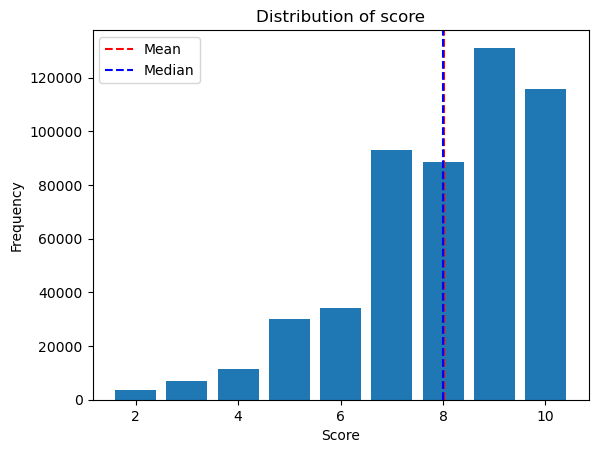

In [36]:

plt.figure()
plt.bar(review_score.index, review_score.values)
plt.axvline(data['Reviewer_Score'].mean(), c='r', ls='--', label= 'Mean')
plt.axvline(data['Reviewer_Score'].median(), c='b', ls='--', label= 'Median')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of score')
plt.legend()
plt.show()

In [37]:
print(f'Score Mean: ', round(data['Reviewer_Score'].mean(), 2))
print(f'Score Median: ', round(data['Reviewer_Score'].median(), 2))
print(f'Standard Deviation of Scores: ', round(data['Reviewer_Score'].std(), 2))

Score Mean:  8.01
Score Median:  8.0
Standard Deviation of Scores:  1.76


The expect of the normal distribution is the most score will be in the range of 5 to 7 and fewer extreme high or low score(10 or 1). But in the actual score distribution in the chart above, we can see that the most score was give is 10, the middle from 5 to 7 is very little.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  int64  
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

The list of columns is numerics is: 
-   `Additional_Number_of_Scoring`  
-   `Average_Score` 
-   `Review_Total_Negative_Word_Counts` 
-   `Total_Number_of_Reviews`
-   `Review_Total_Positive_Word_Counts` 
-   `Total_Number_of_Reviews_Reviewer_Has_Given` 
-   `Reviewer_Score`
-   `lat` and `lng`

In [39]:
#non-numeric columns
data.select_dtypes('object').sample(10)

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
271403,Apollolaan 138 Oud Zuid 1077 BG Amsterdam Neth...,3/29/2017,Hilton Amsterdam,Iceland,Bed is a little stiff hard for our taste,Location staff overall quality,"[' Leisure trip ', ' Family with young childre...",127 day
491717,Via Stamira D Ancona 27 Distretto Viale Monza ...,12/29/2015,Ramada Plaza Milano,United Arab Emirates,Nothing,Everything,"[' Leisure trip ', ' Couple ', ' Standard Doub...",583 day
212710,54 Upper Berkeley Street Westminster Borough L...,11/29/2015,The Sumner Hotel,United Kingdom,No Negative,Friendly staff clean and quiet room Perfect f...,"[' Business trip ', ' Solo traveler ', ' Stand...",613 day
3940,1 8 Russell Square Camden London WC1B 5BE Unit...,4/15/2016,The Principal London,United Kingdom,The biggest issue for me and my group with th...,Location is great and nice and central Stayed...,"[' Business trip ', ' Group ', ' Single Room '...",475 day
79484,19 21 Gt Marlborough St Westminster Borough Lo...,7/7/2017,Courthouse Hotel London,United Kingdom,Very over priced,Perfect location,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",27 days
64600,163 Marsh Wall Docklands Tower Hamlets London ...,1/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,The noise of others even after we contacted t...,The location and overall standard of hotel wa...,"[' Leisure trip ', ' Couple ', ' Standard Doub...",213 day
385043,Nicaragua 47 Sants Montju c 08029 Barcelona Spain,7/11/2017,Acta CITY47,United Kingdom,They haven t changed our sheets for 3 days it...,nothing I hated my trip because of the hotel,"[' Leisure trip ', ' Group ', ' Mini Room ', '...",23 days
87487,2 Bridge Place Victoria Westminster Borough Lo...,4/5/2016,DoubleTree by Hilton London Victoria,United Kingdom,RECIEVING A BISCUIT AT RECEPTION AND ONLY ONE...,CLOSE TO THE STATION,"[' Leisure trip ', ' Couple ', ' Double Room '...",485 day
426989,Rec Comtal 16 18 Ciutat Vella 08003 Barcelona ...,9/7/2015,Catalonia Born,United Kingdom,No Negative,Good hotel good location,"[' Leisure trip ', ' Couple ', ' Double Room '...",696 day
327568,Girona 158 Eixample 08037 Barcelona Spain,1/18/2017,Hotel Well and Come,United Kingdom,Nothing everything was great,Friendly staff beautiful interior free welcom...,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",197 day


### Convert some category columns to numeric

#### Days_since_review 

Remove all the word **day and days** in the `days_since_review` column

In [40]:
# days_since_review columns
data['days_since_review']= data['days_since_review'].str.replace('\D', '').astype(int)

/var/folders/lv/tbn_js5s77ndnb22_v4_z6q80000gn/T/ipykernel_15001/3494888246.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['days_since_review']= data['days_since_review'].str.replace('\D', '').astype(int)


In [84]:
# Check 
data['days_since_review'].head()

0     0
1     0
2     3
3     3
4    10
Name: days_since_review, dtype: int64

#### Review_Date 

    For the `Review_Date` column, we are going to seprate date, month and year. 

In [41]:
# convert Review_Date to datetime
data['Review_Date']= pd.to_datetime( data['Review_Date'])

In [42]:
review_day=data['Review_Date'].dt.day
review_month= data['Review_Date'].dt.month
review_year= data['Review_Date'].dt.year

Now we can add those in to data frame and delete the `Review_Date` column

In [43]:
data['Review_Day']= review_day
data['Review_Month']= review_month
data['Review_Year']= review_year

In [44]:
#drop 'Review_Date'
data.drop(columns='Review_Date', axis=1, inplace=True)

In [45]:
#check it out
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Day,Review_Month,Review_Year
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,3,8,2017
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,3,8,2017
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968,31,7,2017
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968,31,7,2017
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968,24,7,2017


#### Reviewer_Nationality 


Check all the reviewer nation in the dataset

In [46]:
data['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

It is total 197 unique value in the `Reviewer_Nationality` column. It is not a good solution to convert all of the countries in to the dummies value. Let try to look at the proportion of each country to see how it contributes in to the data 

In [47]:
nation_percent= data['Reviewer_Nationality'].value_counts()/data['Reviewer_Nationality'].shape[0]*100

In [48]:
nation_percent

 United Kingdom               47.552439
 United States of America      6.871124
 Australia                     4.204848
 Ireland                       2.874909
 United Arab Emirates          1.984535
                                ...    
 Cape Verde                    0.000194
 Northern Mariana Islands      0.000194
 Tuvalu                        0.000194
 Guinea                        0.000194
 Palau                         0.000194
Name: Reviewer_Nationality, Length: 227, dtype: float64

In [49]:
print(nation_percent[nation_percent>1].sum())
print(nation_percent[nation_percent>1].index)

77.78406865501475
Index([' United Kingdom ', ' United States of America ', ' Australia ',
       ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ',
       ' Netherlands ', ' Switzerland ', ' Germany ', ' Canada ', ' France ',
       ' Israel ', ' Italy ', ' Belgium ', ' Turkey '],
      dtype='object')


Seem like most of the reviewer is from UK, and not too many of them contribute more than 1% of total amount of review and the total portion of of those countries take around 80% in total number of review. In this case, we are going to change all the nation which contribute less than 1% into `'unknown'`

In [50]:
# check which review from the group <1%
unknown= data['Reviewer_Nationality'].map(nation_percent<1)
unknown
#convert the review from the nation <1% to unknown
data['Reviewer_Nationality']=data['Reviewer_Nationality'].mask(unknown, ' Unknown')

In [51]:
#check
data['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 Unknown                      114576
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
Name: Reviewer_Nationality, dtype: int64

Then create dummies from `Reviewer_Nationality` and drop this column

In [52]:
data = pd.get_dummies(data, columns=['Reviewer_Nationality'], drop_first=True)
data

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,Reviewer_Nationality_ Israel,Reviewer_Nationality_ Italy,Reviewer_Nationality_ Netherlands,Reviewer_Nationality_ Saudi Arabia,Reviewer_Nationality_ Switzerland,Reviewer_Nationality_ Turkey,Reviewer_Nationality_ United Arab Emirates,Reviewer_Nationality_ United Kingdom,Reviewer_Nationality_ United States of America,Reviewer_Nationality_ Unknown
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,...,0,0,0,0,0,0,0,0,0,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,...,0,0,0,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,...,0,0,0,0,0,0,0,0,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,...,0,0,0,0,0,0,0,1,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8,Atlantis Hotel Vienna,no trolly or staff to help you take the lugga...,14,2823,location,2,8,...,0,0,0,0,0,0,0,0,0,1
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8,Atlantis Hotel Vienna,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,...,0,0,0,0,0,0,0,0,0,1
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8,Atlantis Hotel Vienna,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,...,0,0,0,0,0,0,0,0,0,1
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8,Atlantis Hotel Vienna,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,...,0,0,0,0,0,0,0,0,0,1


#### Hotel_Address

In [53]:
#check out the Hotel_Address column
hotel_address= data['Hotel_Address'].value_counts()
hotel_address

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

In [54]:
country_city= data['Hotel_Address'].str.split().str[-2:]
country_city

0         [Amsterdam, Netherlands]
1         [Amsterdam, Netherlands]
2         [Amsterdam, Netherlands]
3         [Amsterdam, Netherlands]
4         [Amsterdam, Netherlands]
                    ...           
515733           [Vienna, Austria]
515734           [Vienna, Austria]
515735           [Vienna, Austria]
515736           [Vienna, Austria]
515737           [Vienna, Austria]
Name: Hotel_Address, Length: 515738, dtype: object

In [55]:
country_city= country_city.str.join(' ').str.replace('[', '').str.replace(']','')


/var/folders/lv/tbn_js5s77ndnb22_v4_z6q80000gn/T/ipykernel_15001/2472712653.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  country_city= country_city.str.join(' ').str.replace('[', '').str.replace(']','')


In [56]:
country_city.value_counts()

United Kingdom           262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Hotel_Address, dtype: int64

it look quite good now when we have much less unique value. But the United Kingdom seems like missing the city when other county have city come with the country name. let see how many city in UK in the review.

In [57]:
city=data['Hotel_Address'].str.split(' ').str[-5:-4]
city.value_counts()

[London]       262301
[Center]        24635
[Ciutat]        16114
[City]          13647
[Innere]        12577
                ...  
[122]              33
[180]              28
[34]               14
[Palmanova]        12
[ois]              10
Name: Hotel_Address, Length: 173, dtype: int64

We can see that in the record, all the address is in the London when the country is UK. So we are going to change the **United Kingdom** to **London United Kingdom**

In [58]:

country_city= np.where(country_city == 'United Kingdom', 'London United Kingdom', country_city)


In [59]:
#Check
(country_city=='London United Kingdom').sum()

262301

In [60]:
# add in to Data frame

data['Hotel_Address']= country_city
data['Hotel_Address'].value_counts()

London United Kingdom    262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Hotel_Address, dtype: int64

Now we can get dummies columns from the `Hotel_Address` column

In [61]:
data= pd.get_dummies(data, columns=['Hotel_Address'], drop_first=True)

In [62]:
#Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 37 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Additional_Number_of_Scoring                     515738 non-null  int64  
 1   Average_Score                                    515738 non-null  int64  
 2   Hotel_Name                                       515738 non-null  object 
 3   Negative_Review                                  515738 non-null  object 
 4   Review_Total_Negative_Word_Counts                515738 non-null  int64  
 5   Total_Number_of_Reviews                          515738 non-null  int64  
 6   Positive_Review                                  515738 non-null  object 
 7   Review_Total_Positive_Word_Counts                515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given       515738 non-null  int64  
 9   Reviewer_Score 

#### Hotel_Name

In [63]:
#check out the hotel name
data['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

We are going to drop the Hotel_Name column since we cannot find the common thing in this feature.

#### Tags

Check out `Tags` column

In [64]:
data['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                  5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                 3291
                                                                                                                                         ... 
[' Leisure trip ', ' Family with older children ', ' Suite Family Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']          1
[' Bus

There are many unique tag in the record and it is not posible to turn all of them to number by dummies. so we a going to count the number of tags in each tag and use it as the number to convert

In [65]:
#calculate the number of tag in each tag
tags=data['Tags'].values
tag_count_list=[]
for tag in tags:
    tag_count_list.append(len(ast.literal_eval(tag)))

tag_count_list

[4,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 3,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 6,
 5,
 4,
 5,
 5,
 5,
 3,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 3,


In [66]:
data['Tags']= tag_count_list

In [67]:
#check the change
data['Tags'].head()

0    4
1    4
2    5
3    4
4    5
Name: Tags, dtype: int64

## Data Wrangling

### Convert `Reviewer_Score` into binary. 
-   Score less than 9 -> 0
-   Score is 9 or 10-> 1

In [68]:
data['Reviewer_Score']= np.where(data['Reviewer_Score']<9, 0, 1)

In [69]:
data['Reviewer_Score'].value_counts()

0    268701
1    247037
Name: Reviewer_Score, dtype: int64

In [70]:
data.head()

,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_ Turkey,Reviewer_Nationality_ United Arab Emirates,Reviewer_Nationality_ United Kingdom,Reviewer_Nationality_ United States of America,Reviewer_Nationality_ Unknown,Hotel_Address_Barcelona Spain,Hotel_Address_London United Kingdom,Hotel_Address_Milan Italy,Hotel_Address_Paris France,Hotel_Address_Vienna Austria
0,194,7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,0,0,0,1,0,0,0,0,0
1,194,7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,0,0,0,0,0,0,0,0
2,194,7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,0,0,0,0,0,0,0,0
3,194,7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,0,0
4,194,7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,0,0,0,1,0,0,0,0,0


Drop all non-numeric columns except `Positive_Review`,  `Negative_Review`

In [71]:
#drop all the non-numeric columns except 'Positive_Review', 'Negative_Review'

data_dropped= data.drop(columns='Hotel_Name').copy()

In [72]:
data_dropped

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,...,Reviewer_Nationality_ Turkey,Reviewer_Nationality_ United Arab Emirates,Reviewer_Nationality_ United Kingdom,Reviewer_Nationality_ United States of America,Reviewer_Nationality_ Unknown,Hotel_Address_Barcelona Spain,Hotel_Address_London United Kingdom,Hotel_Address_Milan Italy,Hotel_Address_Paris France,Hotel_Address_Vienna Austria
0,194,7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,4,...,0,0,0,0,1,0,0,0,0,0
1,194,7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,4,...,0,0,0,0,0,0,0,0,0,0
2,194,7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,5,...,0,0,0,0,0,0,0,0,0,0
3,194,7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,4,...,0,0,1,0,0,0,0,0,0,0
4,194,7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,168,8,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,4,...,0,0,0,0,1,0,0,0,0,1
515734,168,8,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,4,...,0,0,0,0,1,0,0,0,0,1
515735,168,8,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,5,...,0,0,0,0,1,0,0,0,0,1
515736,168,8,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,0,4,...,0,0,0,0,1,0,0,0,0,1


In [73]:
#Define X and y
y= data_dropped['Reviewer_Score']
X= data_dropped.drop(columns='Reviewer_Score')


In [74]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [75]:
#size of training data
X_train.shape

(412590, 35)

### Run Vectornizer

In [76]:
postive_review= X_train['Positive_Review']
negative_review= X_train['Negative_Review']

In [77]:
#1. Instantiate
cv= CountVectorizer(stop_words='english', min_df=0.01, max_features=1000, ngram_range=(1, 3))

In [78]:
#2. Fit and transform for negative review
cv.fit(negative_review)
X_neg_trans= cv.transform(negative_review)
negative_matrix= cv.get_feature_names_out()
print('X_pos_trans.shape,', X_neg_trans.shape)
print(negative_matrix)

X_pos_trans.shape, (412590, 128)
['air' 'air conditioning' 'area' 'arrived' 'asked' 'available' 'bad' 'bar'
 'bath' 'bathroom' 'bed' 'beds' 'better' 'bit' 'booked' 'booking'
 'breakfast' 'check' 'city' 'clean' 'coffee' 'cold' 'comfortable'
 'conditioning' 'couldn' 'day' 'days' 'desk' 'did' 'didn' 'dirty' 'don'
 'door' 'double' 'early' 'expensive' 'extra' 'facilities' 'far' 'floor'
 'food' 'free' 'given' 'good' 'got' 'great' 'guests' 'hard' 'having'
 'high' 'hot' 'hotel' 'hotels' 'just' 'left' 'lift' 'like' 'little'
 'location' 'london' 'long' 'lot' 'make' 'money' 'morning' 'need' 'needs'
 'negative' 'nice' 'night' 'noise' 'noisy' 'old' 'open' 'outside' 'paid'
 'parking' 'pay' 'people' 'place' 'pool' 'poor' 'price' 'problem' 'quite'
 'really' 'reception' 'restaurant' 'room' 'room service' 'room small'
 'rooms' 'said' 'service' 'shower' 'size' 'sleep' 'slow' 'small'
 'small room' 'space' 'staff' 'star' 'stay' 'stayed' 'street' 'tea'
 'thing' 'think' 'time' 'times' 'tiny' 'toilet' 'told' 

Convert the negative_matrix to dataframe and add it in to original dataframe

In [79]:
#convert negative matrix to data frame
negative_df= pd.DataFrame.sparse.from_spmatrix(X_neg_trans, columns=negative_matrix )
#add it to df
data_dropped= pd.concat([data_dropped, negative_df], axis=1)

In [80]:
#3. Fit and transform for positive review
cv.fit(postive_review)
X_pos_trans= cv.transform(postive_review)
postive_matrix= cv.get_feature_names_out()
print(X_pos_trans.shape)
print(postive_matrix)


(412590, 157)
['10' 'access' 'amazing' 'area' 'attentive' 'away' 'bar' 'bathroom'
 'beautiful' 'bed' 'bed comfortable' 'beds' 'best' 'big' 'breakfast'
 'breakfast good' 'brilliant' 'bus' 'center' 'central' 'centre' 'check'
 'choice' 'city' 'clean' 'clean comfortable' 'cleanliness' 'close'
 'coffee' 'comfortable' 'comfortable bed' 'comfortable room' 'comfy'
 'comfy bed' 'convenient' 'day' 'decor' 'definitely' 'design' 'desk'
 'distance' 'easy' 'especially' 'excellent' 'excellent location' 'extra'
 'extremely' 'facilities' 'fantastic' 'feel' 'floor' 'food' 'free'
 'friendly' 'friendly helpful' 'friendly helpful staff' 'friendly staff'
 'good' 'good breakfast' 'good location' 'great' 'great location'
 'great staff' 'help' 'helpful' 'helpful friendly' 'helpful staff' 'hotel'
 'hotel great' 'hotel staff' 'just' 'kind' 'large' 'like' 'liked' 'little'
 'located' 'location' 'location close' 'location excellent'
 'location friendly' 'location good' 'location great' 'location perfect'
 'location

We convert the sparse matrix in to dataframe and add it in to the original data frame

In [81]:
#convert positive matrix to data frame
positive_df= pd.DataFrame.sparse.from_spmatrix(X_pos_trans, columns=postive_matrix )
#add it to df
data_dropped= pd.concat([data_dropped, positive_df], axis=1)


In [82]:
data_dropped.shape

(515738, 321)

The **min_df** is used for finding  and removing the words which appear **not frequently** in the data. For examlple:
-   `min_df = 0.5`: is ignore the word that appear less than 50% of the documents.
-   `min_df = 5`: is ignore the wors that appear less than 5 times in the documents.